EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#%pip install kagglehub

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

# print("Path to dataset files:", path)

In [4]:
amazon_uk_prod = pd.read_csv("../datasets/amz_uk_price_prediction_dataset.csv")

In [5]:
amazon_uk_prod.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [6]:
amazon_uk_prod.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [22]:
amazon_uk_prod.shape

(2443651, 9)

In [7]:
amazon_uk_prod.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [8]:
amazon_uk_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?



In [9]:

freq_df = amazon_uk_prod['category'].value_counts().reset_index()
freq_df.columns = ['category', 'category_freq']
freq_df


,category,category_freq
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
...,...,...
291,Motorbike Chassis,107
292,Alexa Built-In Devices,107
293,Plugs,107
294,Smart Home Security & Lighting,104


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

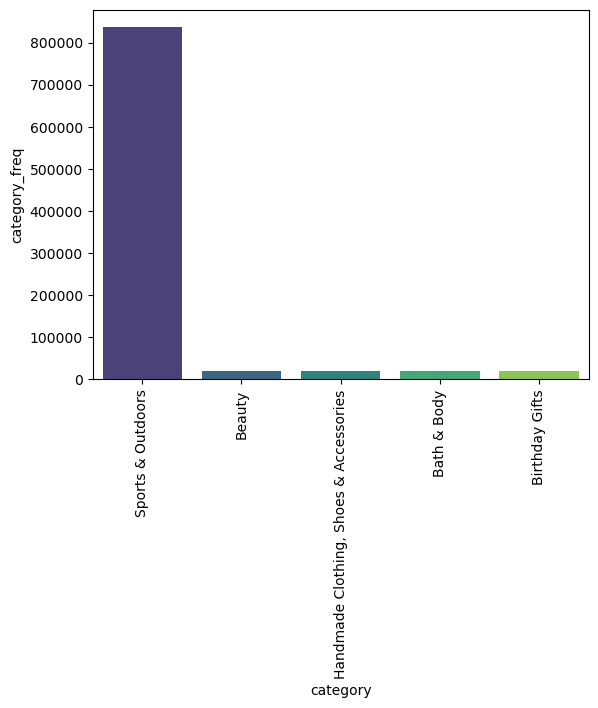

In [10]:

sns.barplot(
    x="category",
    y="category_freq",
    hue="category",      
    data=freq_df.head(5),
    palette="viridis",
    legend=False
)

plt.xticks(rotation=90)
plt.show()

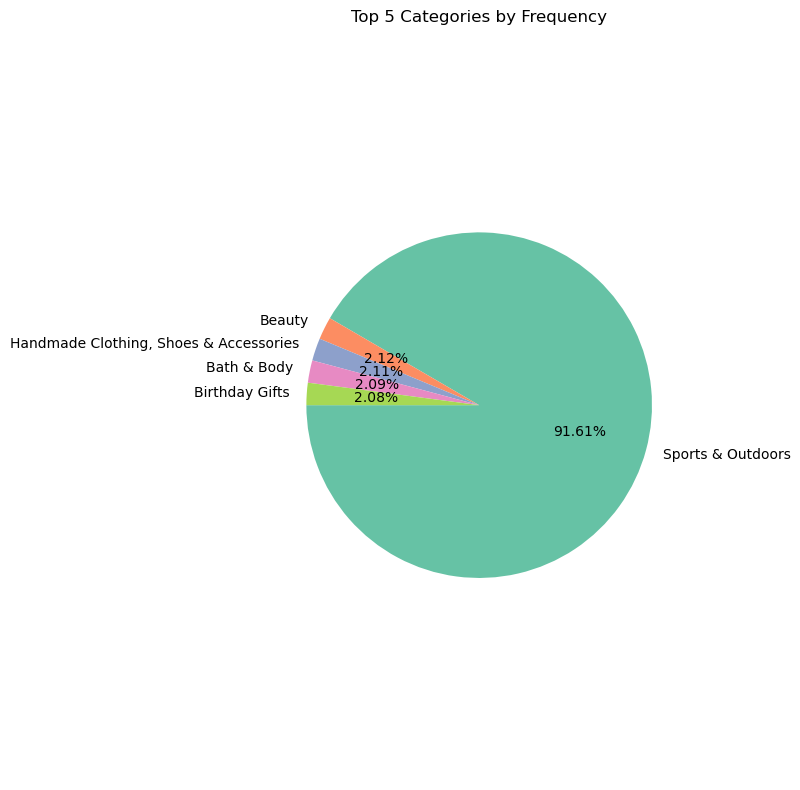

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ensure freq_df has columns ['category', 'category_freq']
top5 = freq_df.set_index('category')['category_freq'].head(5)

# plot
plt.figure(figsize=(8,8))
top5.plot.pie(
    autopct='%1.2f%%',
    startangle=180,
    colors=sns.color_palette('Set2'),
    ylabel=''          # remove automatic y-label
)
plt.axis('equal')      # keep the pie circular
plt.title('Top 5 Categories by Frequency')
plt.tight_layout()
plt.show()


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [15]:
from scipy import stats

prices = amazon_uk_prod['price'].dropna()

mean_price = prices.mean()
median_price = prices.median()
mode_res = stats.mode(prices, keepdims=True)
mode_value = mode_res.mode[0]
mode_count = mode_res.count[0]


pandas_modes = prices.mode().tolist()

mean_price, median_price, mode_value, mode_count, pandas_modes


(np.float64(89.24380943923663),
 19.09,
 np.float64(9.99),
 np.int64(48922),
 [9.99])

In [16]:
# Basic measures of dispersion
variance = amazon_uk_prod["price"].var()
std_dev = amazon_uk_prod["price"].std()
price_range = amazon_uk_prod["price"].max() - amazon_uk_prod["price"].min()

# Interquartile Range (IQR)
Q1 = amazon_uk_prod["price"].quantile(0.25)
Q3 = amazon_uk_prod["price"].quantile(0.75)
iqr = Q3 - Q1

print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range: {price_range:.2f}")
print(f"IQR (Interquartile Range): {iqr:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Range: 100000.00
IQR (Interquartile Range): 36.00


Variance = 119,445.49 and Standard deviation ≈ 345.61 show that prices are spread out a lot around the mean.

Range = 100,000 tells us there is at least one price that is extremely different from the rest (an extreme outlier).

IQR = 36 means the middle 50% of prices lie within a narrow band of width 36 (e.g., from Q1 to Q3), so most products are clustered closely together.

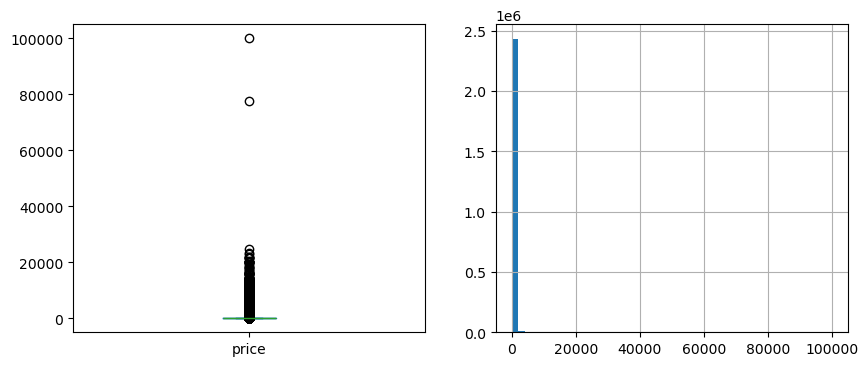

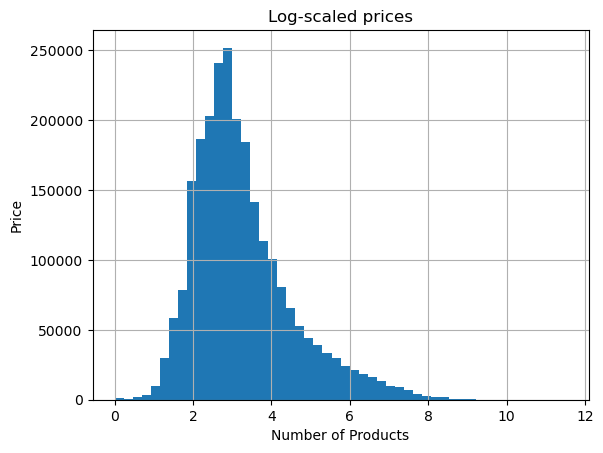

In [30]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(10,4))
amazon_uk_prod['price'].plot.box(ax=axes[0])
amazon_uk_prod['price'].hist(bins=50, ax=axes[1])
plt.show()

# Log view
amazon_uk_prod.loc[amazon_uk_prod['price']>0, 'price'].apply(np.log1p).hist(bins=50)
plt.ylabel('Price')
plt.xlabel('Number of Products')
plt.title('Log-scaled prices')
plt.show()


In [21]:
import numpy as np
import pandas as pd
from scipy import stats  # optional for zscore method

# assume df has columns 'price' and 'category'
prices = amazon_uk_prod['price'].dropna()

# IQR method
q1 = prices.quantile(0.25)
q3 = prices.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# boolean mask of outliers
outlier_mask = (amazon_uk_prod['price'] < lower_bound) | (amazon_uk_prod['price'] > upper_bound)

# dataframe of outliers with category
outliers_df = amazon_uk_prod.loc[outlier_mask, ['price', 'category']].copy()
outliers_df = outliers_df.sort_values('price', ascending=False).reset_index(drop=True)

# summary: how many outliers and sample rows
num_outliers = len(outliers_df)
top_outliers = outliers_df.head(20)      # inspect top 20 extreme values

num_outliers, top_outliers


(327688,
         price                                          category
 0   100000.00                                 Sports & Outdoors
 1    77752.00                                       Desktop PCs
 2    24674.59                          Garden Storage & Housing
 3    23482.73                            Scanners & Accessories
 4    22933.42                                        Projectors
 5    21999.00                                 Sports & Outdoors
 6    21999.00                                 Sports & Outdoors
 7    21464.82                          Garden Storage & Housing
 8    21464.82                          Garden Storage & Housing
 9    21464.82                          Garden Storage & Housing
 10   20489.75                                 Sports & Outdoors
 11   20216.00  Uninterruptible Power Supply Units & Accessories
 12   20015.45                                 Sports & Outdoors
 13   19999.00                                 Sports & Outdoors
 14   19999.00  

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?



In [31]:
# Calculate measures of centrality for ratings
mean_rating = amazon_uk_prod['stars'].mean()
median_rating = amazon_uk_prod['stars'].median()
mode_rating = amazon_uk_prod['stars'].mode()[0]
print("=== Product Rating Analysis ===")
print(f"Mean stars:   {mean_rating:.2f}")
print(f"Median stars: {median_rating:.2f}")
print(f"Mode stars:   {mode_rating:.2f}")
#How customers generally rate products
if mean_rating > 4.0:
    print("Overall, products are rated highly by customers.")
elif mean_rating > 3.0:
    print("Products receive moderate ratings from customers.")
else:
    print("Products tend to receive lower ratings from customers.")
# Is there common trend in ratings?
if mean_rating == median_rating == mode_rating:
    print("Ratings are symmetrically distributed around the mean.")
elif mean_rating > median_rating > mode_rating:
    print("Ratings are right-skewed, with some lower ratings pulling the mean down.")
elif mean_rating < median_rating < mode_rating:
    print("Ratings are left-skewed, with some higher ratings pulling the mean up.")
else:
    print("Ratings distribution is complex, with no clear skewness.")

=== Product Rating Analysis ===
Mean stars:   2.15
Median stars: 0.00
Mode stars:   0.00
Products tend to receive lower ratings from customers.
Ratings distribution is complex, with no clear skewness.


#### Interpretation: 

The fact that both median and mode are zero while the mean is 2.15 suggests a heavily skewed or bimodal distribution. Many ratings are zero, but there’s also a cluster of higher ratings pulling the mean upward.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?



In [32]:

variance_stars = amazon_uk_prod["stars"].var()
std_stars = amazon_uk_prod["stars"].std()
Q1_stars = amazon_uk_prod["stars"].quantile(0.25)
Q3_stars = amazon_uk_prod["stars"].quantile(0.75)
iqr_stars = Q3_stars - Q1_stars

print(f"Variance: {variance_stars:.4f}")
print(f"Standard Deviation: {std_stars:.4f}")
print(f"IQR (Interquartile Range): {iqr_stars:.2f}")

Variance: 4.8174
Standard Deviation: 2.1949
IQR (Interquartile Range): 4.40


3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [36]:
skewness = amazon_uk_prod['stars'].skew()
kurtosis = amazon_uk_prod['stars'].kurt()

print(f"Skewness: {skewness:.3f}")
print(f"Kurtosis: {kurtosis:.3f}")

Skewness: 0.081
Kurtosis: -1.926


Skewness near zero means ratings don’t lean strongly toward high or low values.

If anything, the tiny positive skew suggests a slight lean toward higher ratings, but it’s minimal.

The flat kurtosis means ratings are spread out, not tightly clustered around the mean.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

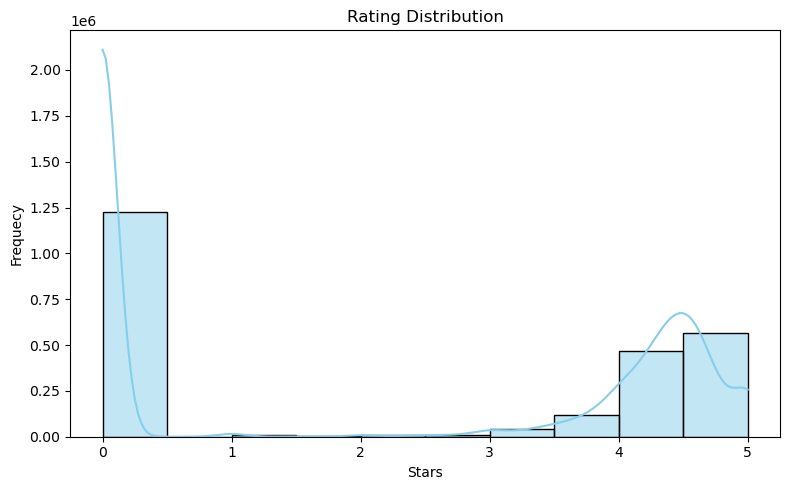

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(amazon_uk_prod['stars'], bins=10, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Stars")
plt.ylabel("Frequecy")
plt.tight_layout()
plt.show()

#### Interpretation: 

The distribution is flat and spread out, not tightly clustered. The histogram confirms this: a huge spike at 0, then a second cluster between 3 and 5. This is bimodal, not normal.

#### Final Interpretation

Bimodal distribution: One peak at 0 (possibly default or missing), another between 3–5 (genuine ratings).

Mean is misleading: It’s pulled up by the second peak, but doesn’t represent the bulk of ratings.

Median and mode = 0: Suggest a large portion of ratings are either missing, defaulted, or reflect dissatisfaction.

Flat kurtosis: Confirms that ratings are broadly spread, not tightly packed around the mean.